Q. 10.

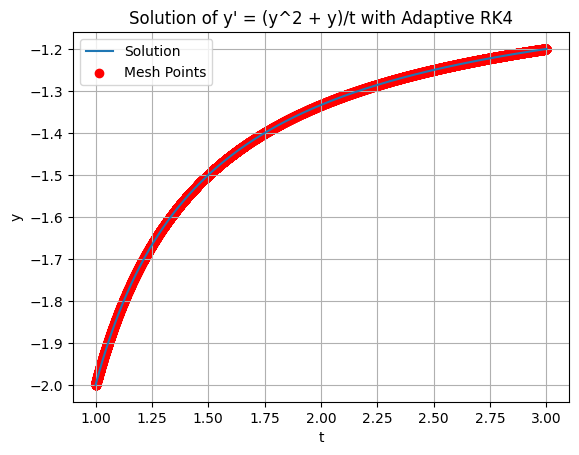

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def rk4_adaptive(dy_dt, t_span, y0, abs_tol):
    t_values = [t_span[0]]
    y_values = [y0]
    h = 0.01  # Initial step size
    t = t_span[0]
    y = y0

    while t < t_span[1]:
        # Calculate slopes
        k1 = h * dy_dt(t, y)
        k2 = h * dy_dt(t + 0.5 * h, y + 0.5 * k1)
        k3 = h * dy_dt(t + 0.5 * h, y + 0.5 * k2)
        k4 = h * dy_dt(t + h, y + k3)

        # Estimate the local error
        error = np.abs((k1 + 2*k2 + 2*k3 + k4) / 6)

        # Check if the error is within the absolute tolerance
        if error < abs_tol:
            t += h
            y += (k1 + 2*k2 + 2*k3 + k4) / 6
            t_values.append(t)
            y_values.append(y)
        else:
            # Adjust step size based on error
            h *= 0.9 * (abs_tol / error)**0.2

    return np.array(t_values), np.array(y_values)

# Define the differential equation
def dy_dt(t, y):
    return (y**2 + y) / t

# Define initial conditions and parameters
t_span = [1, 3]
y0 = -2
abs_tol = 1e-4

# Solve the differential equation using adaptive RK4
t_values, y_values = rk4_adaptive(dy_dt, t_span, y0, abs_tol)

# Plot the solution and mesh points
plt.plot(t_values, y_values, label='Solution')
plt.scatter(t_values, y_values, color='red', label='Mesh Points')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution of y\' = (y^2 + y)/t with Adaptive RK4')
plt.legend()
plt.grid(True)
plt.show()


 Python using the scipy.integrate.solve_ivp function with the RK45 method (an adaptive step size Runge-Kutta method) to solve an ODE.

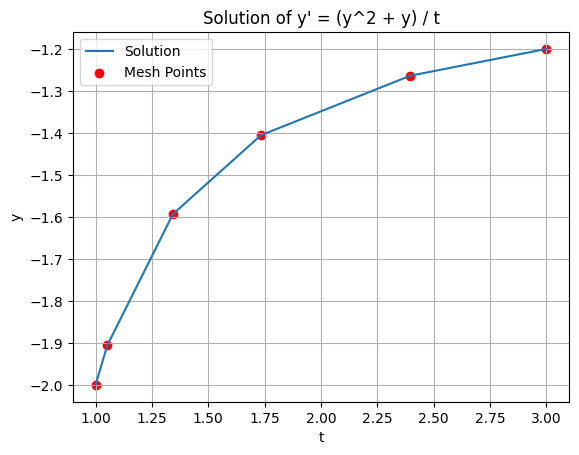

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, y):
    return (y**2 + y) / t

# Initial conditions
t_span = [1, 3]
y0 = [-2]

# Define the absolute tolerance
abs_tol = 1e-4

# Solve using solve_ivp with adaptive step size
sol = solve_ivp(f, t_span, y0, method='RK45', atol=abs_tol, rtol=abs_tol)

# Plot the solution and mesh points
plt.plot(sol.t, sol.y[0], label='Solution')
plt.scatter(sol.t, sol.y[0], color='red', label='Mesh Points')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution of y\' = (y^2 + y) / t')
plt.grid(True)
plt.legend()
plt.show()
